# Atelier : point de vue

Le but de cet atelier est de travailler sur le thème de la numérisation de scènes 3D à partir de photos. Il existe aujourd'hui des outils permettant sur un mobile de prendre de multiples photos d'un objet et d'obtenir ensuite une version 3D de l'objet. Vous trouverez ci-dessous un exemple.

In [1]:
%%html
<iframe 
    width="560" height="315" 
    src="https://www.youtube.com/embed/8_pbAT99s7M?si=8e3HnPnyRRzKNuZd" 
    title="YouTube video player" 
    referrerpolicy="strict-origin-when-cross-origin"
    allowfullscreen
    >
</iframe>

La science derrière ces outils est assez complexe et est encore un sujet de recherche actif, en particulier avec le développement des intelligences artificielles. Notre but ici est de travailler sur une version très simplifiée du problème et de voir ce qu'on peut déjà en déduire. Pour réaliser cette reconstruction sans autre information que les images, il faut trouver des points de correspondance entre les images et à la fois déterminer la position 3D de ces points et déterminer d'où ont été prises les photos. Nous allons donc simplifier le problème : **en supposant que nous connaissons un objet en 3D, peut-on déterminer d'où a été prise une photo de cet objet ?**

In [1]:
%run -i base_point_de_vue.py

In [2]:
%matplotlib inline

In [3]:
desactiver_3d = False

## Objectif

Nous allons nous intéresser à une scène 3D très simple constituée de 4 boîtes rectangulaires, une rouge, une verte, une bleue et une grise. Pour cette scène nous avons pris une photo depuis un point de vue (encadrée en haut à droite). En cliquant et glissant sur l'image de gauche, essayez d'obtenir une image identique à la photo. Pour savoir si vous avez bien ajusté votre point de vue, vous pouvez cliquer sur la vue 3D, vous verrez apparaître à la fois la position 3D du point sur lequel vous avez cliqué (ou (0,0,0) s'il n'y en a pas), et le pixel dans lequel ce point est affiché. Maintenant posez-vous la question : **comment faites vous ?** Et du coup pourriez-vous écrire un programme pour le faire à votre place ?

In [4]:
boites = scene_boites()
camera = Camera()
app = camera.application(boites, souris = True)
retrouver(app, "vue_test.png")

Pour pouvoir automatiser les choses, il faut déjà comprendre les différents paramètres permettant de régler le point de vue. Dans le premier exemple ci-dessus, vous pouviez utiliser la souris pour régler le point de vue, mais cette interaction ne permet pas de gérer tous les paramètres du point de vue, seulement trois : la *longitude*, la *latitude* et la *distance*. La caméra possède en réalité plus de paramètres :

* x, y et z pour le centre sont des coordonnées qui permettent de régler le point visé par la caméra
* la longitude est un angle entre 0 et 360 degrés qui permet de tourner autour du point visé
* la latitude est un angle entre -90 et 90 degrés qui permet d'observer de plus haut ou de plus bas
* la distance est une longueur qui donne l'écart entre le point visé et la position de la caméra

Le contrôle à la souris ci-dessus ne permettait d'agir que sur la longitude, la latitude et la distance. Ci-dessous, le contrôle à la souris est désactivé, mais vous pouvez expérimenter tous ces paramètres.

In [5]:
camera = Camera()
app = camera.application(boites)
retrouver(app, "vue_tous_parametres.png", camera.controles())

Pour pouvoir automatiser tout ça, vous disposez d'un certain nombre de fonctions. Tout d'abord la fonction `pixel` vous permet de déterminer avec les paramètres actuels de la vue dans quel pixel se retrouve projeté un point 3D donné. Par exemple, sur la scène proposée, le coin le plus à l'extérieur du cube rouge, sur sa face du haut, a pour coordonnées $(-2, 2, 2)$. Vous pouvez simplement déterminer sur quel pixel ce point se projete :

In [6]:
camera.pixel((-2,2,2))

array([135, 250])

Vous pouvez vérifier en cliquant sur la vue 3D. Il vous est également possible d'obtenir les valeurs actuelles des paramètres de la caméra via la fonction `lire_controles` :

In [7]:
camera.lire()

{'longitude': 45.0,
 'latitude': 31.00000000000001,
 'distance': 11.58,
 'centre_x': 0.0,
 'centre_y': 1.0,
 'centre_z': 0.0}

Pour obtenir la valeur d'un paramètre en particulier :

In [8]:
camera.lire("longitude")

45.0

Enfin, un programme pourra agir sur la caméra en utilisant la fonction `ecrire_camera` qui permet de fournir pour chaque paramètre une valeur, et qui mettra à jour la caméra de l'application. Par exemple, pour fixer la longitude de la caméra à 150 degrés, on peut faire :

In [9]:
camera.ecrire(longitude = 150)

On peut par exemple faire une petite boucle qui fait tourner la caméra en utilisant la longitude (une fois la cellule suivante exécutée, allez voir l'application, vous devriez normalement voir la vue 3D tourner).

In [10]:
for i in range(360):
    longitude = camera.lire("longitude")
    camera.ecrire(longitude = (longitude + 1) % 360)
    time.sleep(0.03)

Enfin si vous avez désactivé la 3D ou souhaitez accéder à l'image pixel par pixel, vous pouvez dessiner l'image vue par la caméra sans 3D :

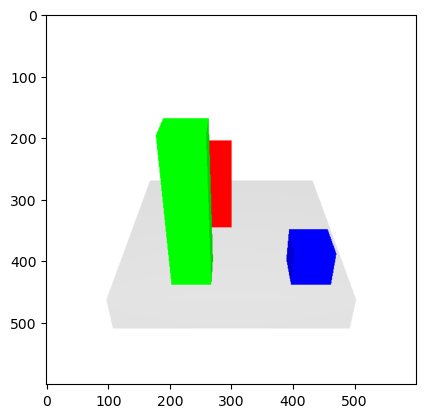

In [13]:
img = camera.dessiner(boites)
plt.imshow(img)
plt.show()

## A vous

Pour vous simplifier la vie pour commencer, voici une première image pour laquelle seule la longitude a été changée.

In [12]:
camera = Camera()
app = camera.application(boites)
retrouver(app, "vue_longitude.png", camera.controles(only = "longitude"))

A vous d'écrire un programme pour retrouver les bons paramètres ! Normalement pour cette image, la longitude à trouver est 202. Une fois ce problème résolu, à vous de complexifier le problème en jouant sur plus de paramètres.